# ❤️ Heart Health — Task 2 Notebook

**Dataset filename:** `Heart_Disease_Patient_Data.csv`

### Objective
This Texas-style notebook performs **cleaning, exploratory data analysis (EDA), and visualization** on a heart-health dataset containing patient-level cardiac risk indicators. It is written to be both informative and fast (balanced plotting: nice Seaborn visuals with safe sampling/fallbacks).

**Notebook outline**:
1. Load & inspect data
2. Clean & prepare
3. Feature engineering
4. Descriptive statistics & grouped summaries
5. Visualizations (optimized)
6. Correlation & relationship analysis
7. Final insights

In [46]:
# Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.width', 120)
pd.set_option('display.max_columns', 50)

# Plot style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)
print('Libraries imported and display options set')

Libraries imported and display options set


In [48]:
# Step 2: Load dataset (use the exact filename you uploaded)
file_path = 'Heart_Disease_Patient_Data.csv'
df = pd.read_csv(file_path)

# Quick preview
print('Loaded file:', file_path)
df.head()


Loaded file: Heart_Disease_Patient_Data.csv


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [50]:
# Step 3: Dataset info and shape
print('Shape -> rows, columns:', df.shape)
print('\nColumn dtypes and non-null counts:')
df.info()


Shape -> rows, columns: (180, 14)

Column dtypes and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex             

In [52]:
# Step 4: Column names (exact, so we use them later as-is)
cols = ['patient_id', 'slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved', 'exercise_induced_angina']
print('Columns found:')
for i,c in enumerate(cols):
    print(f"{i+1}. {c}")

# Suggest a friendly filename (optional)
print('\nSuggested friendly filename: Heart_Disease_Patient_Data.csv')


Columns found:
1. patient_id
2. slope_of_peak_exercise_st_segment
3. thal
4. resting_blood_pressure
5. chest_pain_type
6. num_major_vessels
7. fasting_blood_sugar_gt_120_mg_per_dl
8. resting_ekg_results
9. serum_cholesterol_mg_per_dl
10. oldpeak_eq_st_depression
11. sex
12. age
13. max_heart_rate_achieved
14. exercise_induced_angina

Suggested friendly filename: Heart_Disease_Patient_Data.csv


In [54]:
# Step 5: Missing values summary
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percent})


,Missing Values,Percentage
patient_id,0,0.0
slope_of_peak_exercise_st_segment,0,0.0
thal,0,0.0
resting_blood_pressure,0,0.0
chest_pain_type,0,0.0
num_major_vessels,0,0.0
fasting_blood_sugar_gt_120_mg_per_dl,0,0.0
resting_ekg_results,0,0.0
serum_cholesterol_mg_per_dl,0,0.0
oldpeak_eq_st_depression,0,0.0


In [56]:
# Step 6: Duplicates and basic cleaning
# Count duplicates
dup_count = df.duplicated().sum()
print('Duplicate rows before:', dup_count)

# Drop exact duplicates
if dup_count > 0:
    df.drop_duplicates(inplace=True)
    print('Duplicates removed. New shape:', df.shape)
else:
    print('No exact duplicate rows found.')

# Trim whitespace in string columns (common issue)
str_cols = df.select_dtypes(include='object').columns
for c in str_cols:
    df[c] = df[c].astype(str).str.strip()

print('Whitespace trimmed from object columns (if any)')


Duplicate rows before: 0
No exact duplicate rows found.
Whitespace trimmed from object columns (if any)


In [58]:
# Step 7: Convert suitable columns to 'category' dtype for efficiency
for c in df.columns:
    if df[c].dtype == 'int64' or df[c].dtype == 'object':
        nunique = df[c].nunique()
        if nunique <= 10 and c not in ['patient_id', 'age']:
            df[c] = df[c].astype('category')
            print(f"Converted {c} to 'category' (unique={nunique})")

# Show dtypes after conversion
print('\nDtypes after conversions:')
print(df.dtypes)


Converted slope_of_peak_exercise_st_segment to 'category' (unique=3)
Converted thal to 'category' (unique=3)
Converted chest_pain_type to 'category' (unique=4)
Converted num_major_vessels to 'category' (unique=4)
Converted fasting_blood_sugar_gt_120_mg_per_dl to 'category' (unique=2)
Converted resting_ekg_results to 'category' (unique=3)
Converted sex to 'category' (unique=2)
Converted exercise_induced_angina to 'category' (unique=2)

Dtypes after conversions:
patient_id                                object
slope_of_peak_exercise_st_segment       category
thal                                    category
resting_blood_pressure                     int64
chest_pain_type                         category
num_major_vessels                       category
fasting_blood_sugar_gt_120_mg_per_dl    category
resting_ekg_results                     category
serum_cholesterol_mg_per_dl                int64
oldpeak_eq_st_depression                 float64
sex                                     categ

In [60]:
# Step 8: Descriptive statistics
print('Numeric summary:\n')
df.describe()


Numeric summary:



,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,131.311111,249.211111,1.010000,54.811111,149.483333
std,17.010443,52.717969,1.121357,9.334737,22.063513
min,94.000000,126.000000,0.000000,29.000000,96.000000
25%,120.000000,213.750000,0.000000,48.000000,132.000000
50%,130.000000,245.500000,0.800000,55.000000,152.000000
75%,140.000000,281.250000,1.600000,62.000000,166.250000
max,180.000000,564.000000,6.200000,77.000000,202.000000


In [62]:
# Step 9: Categorical value counts (fast)
cat_cols = df.select_dtypes(include=['category','object']).columns.tolist()
for c in cat_cols:
    print(f"\nValue counts for {c} (top 10):")
    print(df[c].value_counts().head(10))



Value counts for patient_id (top 10):
patient_id
0z64un    1
sqddbc    1
lpub9d    1
bv01fp    1
9dqkpy    1
2fqzg8    1
1jruhz    1
ju1wdc    1
f4n8ny    1
97v1yz    1
Name: count, dtype: int64

Value counts for slope_of_peak_exercise_st_segment (top 10):
slope_of_peak_exercise_st_segment
1    93
2    75
3    12
Name: count, dtype: int64

Value counts for thal (top 10):
thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64

Value counts for chest_pain_type (top 10):
chest_pain_type
4    82
3    57
2    28
1    13
Name: count, dtype: int64

Value counts for num_major_vessels (top 10):
num_major_vessels
0    106
1     37
2     23
3     14
Name: count, dtype: int64

Value counts for fasting_blood_sugar_gt_120_mg_per_dl (top 10):
fasting_blood_sugar_gt_120_mg_per_dl
0    151
1     29
Name: count, dtype: int64

Value counts for resting_ekg_results (top 10):
resting_ekg_results
2    94
0    85
1     1
Name: count, dtype: int64

Value counts 

In [64]:
# Step 10: Feature engineering - create age groups
if 'age' in df.columns:
    bins = [0, 30, 45, 60, 100]
    labels = ['<=30','31-45','46-60','60+']
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
    df['age_group'] = df['age_group'].astype('category')
    print('age_group column created')
    display(df['age_group'].value_counts())
else:
    print('age column not found; skipping age_group creation')


age_group column created


age_group
46-60    90
60+      53
31-45    36
<=30      1
Name: count, dtype: int64

In [66]:
# Step 11: Grouped summary by age_group and sex
num_cols = df.select_dtypes(include=['number']).columns.tolist()
print('Numeric columns used for grouping:', num_cols[:6])

if 'age_group' in df.columns:
    group_cols = ['age_group']
    if 'sex' in df.columns:
        group_cols.append('sex')
    grouped = df.groupby(group_cols)[num_cols].mean().round(2)
    display(grouped)
else:
    print('age_group not available; showing mean by sex if present')
    if 'sex' in df.columns:
        display(df.groupby('sex')[num_cols].mean().round(2))


Numeric columns used for grouping: ['resting_blood_pressure', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'age', 'max_heart_rate_achieved']


resting_blood_pressure  serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression    age  \
age_group sex                                                                                         
<=30      0                       NaN                          NaN                       NaN    NaN   
          1                    130.00                       204.00                      0.00  29.00   
31-45     0                    118.89                       214.78                      0.46  41.56   
          1                    125.93                       240.67                      0.57  41.63   
46-60     0                    131.23                       263.64                      0.84  53.23   
          1                    131.29                       238.90                      1.23  54.24   
60+       0                    139.00                       275.60                      0.99  65.60   
          1                    133.79                       260.29                      1.26  65.71   

               max_heart_rate_achieved  
age_group sex                           
<=30      0                        NaN  
          1                     202.00  
31-45     0                     163.11  
          1                     164.41  
46-60     0                     154.32  
          1                     147.28  
60+       0                     144.28  
          1                     135.04

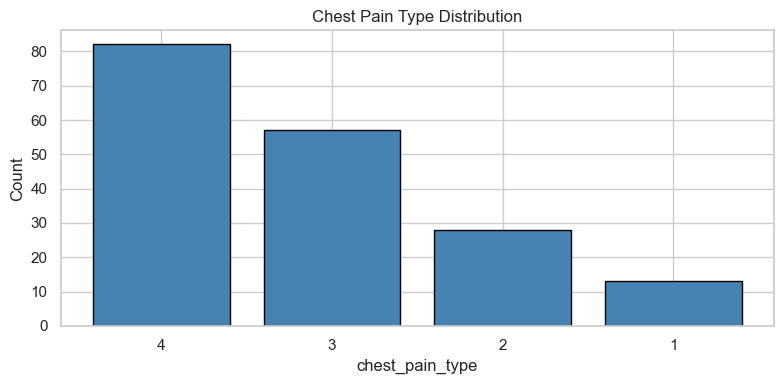

In [68]:
# Step 12: Fast visualization 1 - bar chart for chest_pain_type (Matplotlib)
if 'chest_pain_type' in df.columns:
    counts = df['chest_pain_type'].value_counts()
    plt.figure(figsize=(8,4))
    plt.bar(counts.index.astype(str), counts.values, color='steelblue', edgecolor='black')
    plt.title('Chest Pain Type Distribution')
    plt.xlabel('chest_pain_type')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
else:
    print('chest_pain_type column not present')


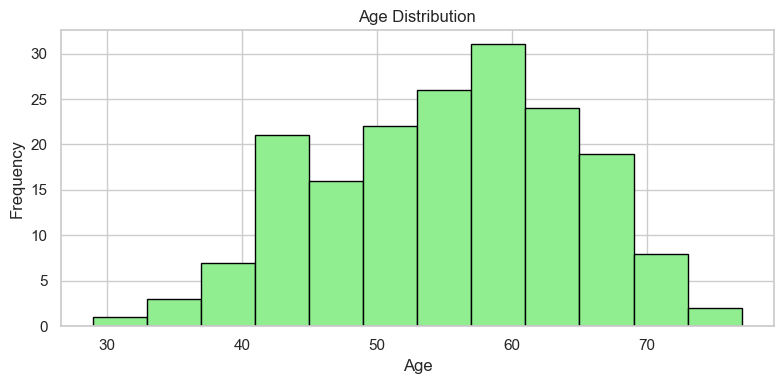

In [70]:
# Step 13: Fast visualization 2 - histogram for age
if 'age' in df.columns:
    plt.figure(figsize=(8,4))
    plt.hist(df['age'], bins=12, color='lightgreen', edgecolor='black')
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
else:
    print('age column not present')


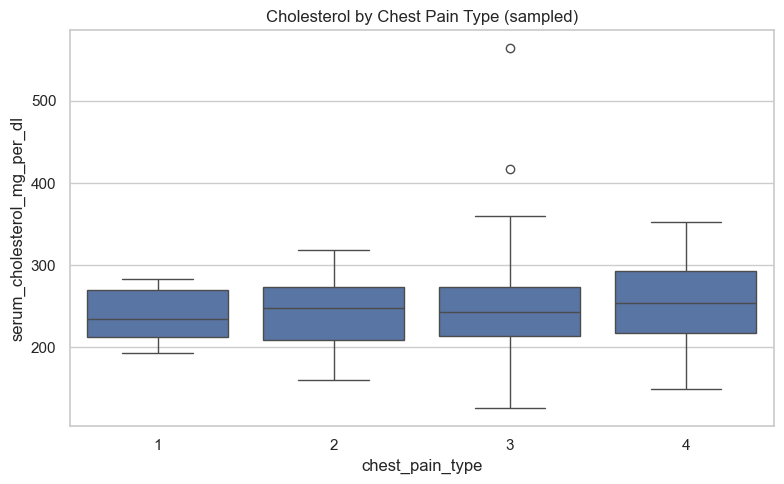

In [72]:
# Step 14: Fast visualization 3 - boxplot of serum_cholesterol_mg_per_dl by chest_pain_type (sampled)
if 'serum_cholesterol_mg_per_dl' in df.columns and 'chest_pain_type' in df.columns:
    sample = df[['serum_cholesterol_mg_per_dl','chest_pain_type']].sample(n=min(200, len(df)), random_state=42)
    plt.figure(figsize=(8,5))
    sns.boxplot(x='chest_pain_type', y='serum_cholesterol_mg_per_dl', data=sample)
    plt.title('Cholesterol by Chest Pain Type (sampled)')
    plt.xlabel('chest_pain_type')
    plt.ylabel('serum_cholesterol_mg_per_dl')
    plt.tight_layout()
    plt.show()
else:
    print('Required columns for this plot are not present')


Numeric columns found: ['resting_blood_pressure', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'age', 'max_heart_rate_achieved']


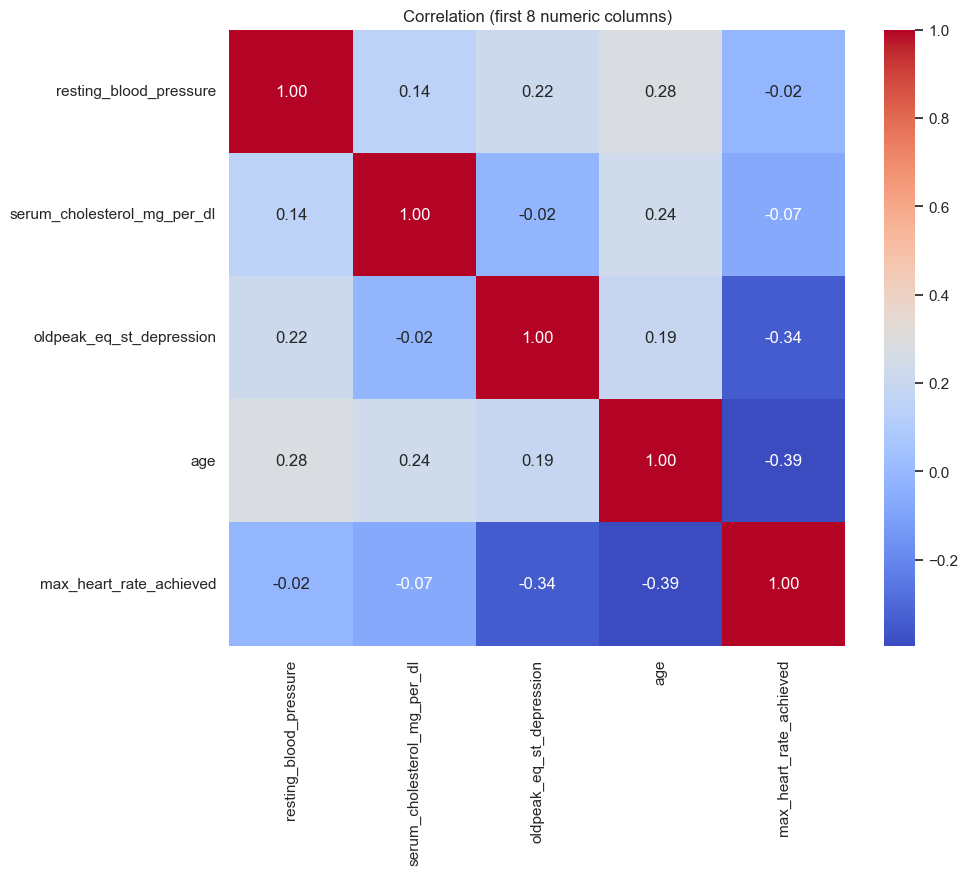

In [74]:
# Step 15: Correlation heatmap (numeric columns, limited to first 8 for speed)
num_cols = df.select_dtypes(include=['number']).columns.tolist()
print('Numeric columns found:', num_cols)
if len(num_cols) > 1:
    use_cols = num_cols[:8]
    corr = df[use_cols].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title('Correlation (first 8 numeric columns)')
    plt.show()
else:
    print('Not enough numeric columns for correlation heatmap')


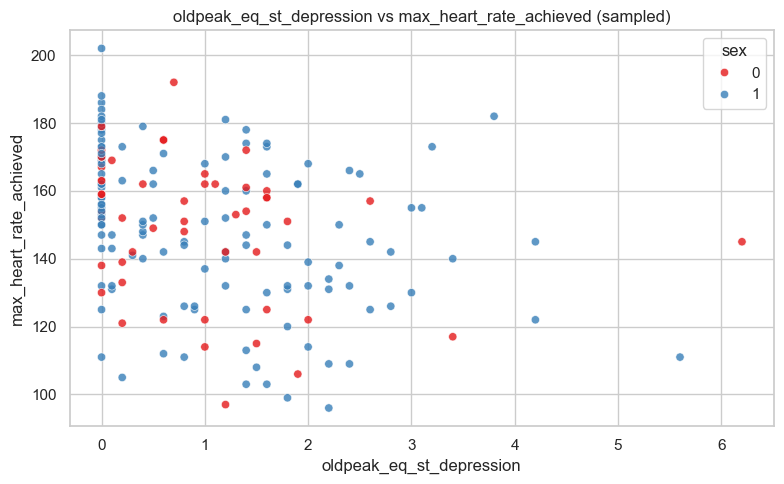

In [76]:
# Step 16: Scatter relationship (sampled) - oldpeak_eq_st_depression vs max_heart_rate_achieved
x_col = 'oldpeak_eq_st_depression'
y_col = 'max_heart_rate_achieved'
if x_col in df.columns and y_col in df.columns:
    sample = df[[x_col,y_col,'sex']].sample(n=min(300,len(df)), random_state=1)
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=sample[x_col], y=sample[y_col], hue=sample['sex'] if 'sex' in sample.columns else None, palette='Set1', alpha=0.8)
    plt.title(f'{x_col} vs {y_col} (sampled)')
    plt.tight_layout()
    plt.show()
else:
    print('Columns for scatter not available')


In [78]:
# Step 17: Top 10 patients by max_heart_rate_achieved
if 'max_heart_rate_achieved' in df.columns:
    display(df.sort_values(by='max_heart_rate_achieved', ascending=False).head(10)[['patient_id','age','sex','max_heart_rate_achieved']])
else:
    print('Column max_heart_rate_achieved not found')


,patient_id,age,sex,max_heart_rate_achieved
18,mc750a,29,1,202
121,f4n8ny,34,0,192
139,srm6ut,44,1,188
35,pjgqa3,48,1,186
27,f4g1ay,52,1,184
100,rfj25e,39,1,182
14,f06u72,38,1,182
67,f70grj,43,1,181
3,l2xjde,40,1,181
138,ebloe5,44,1,180


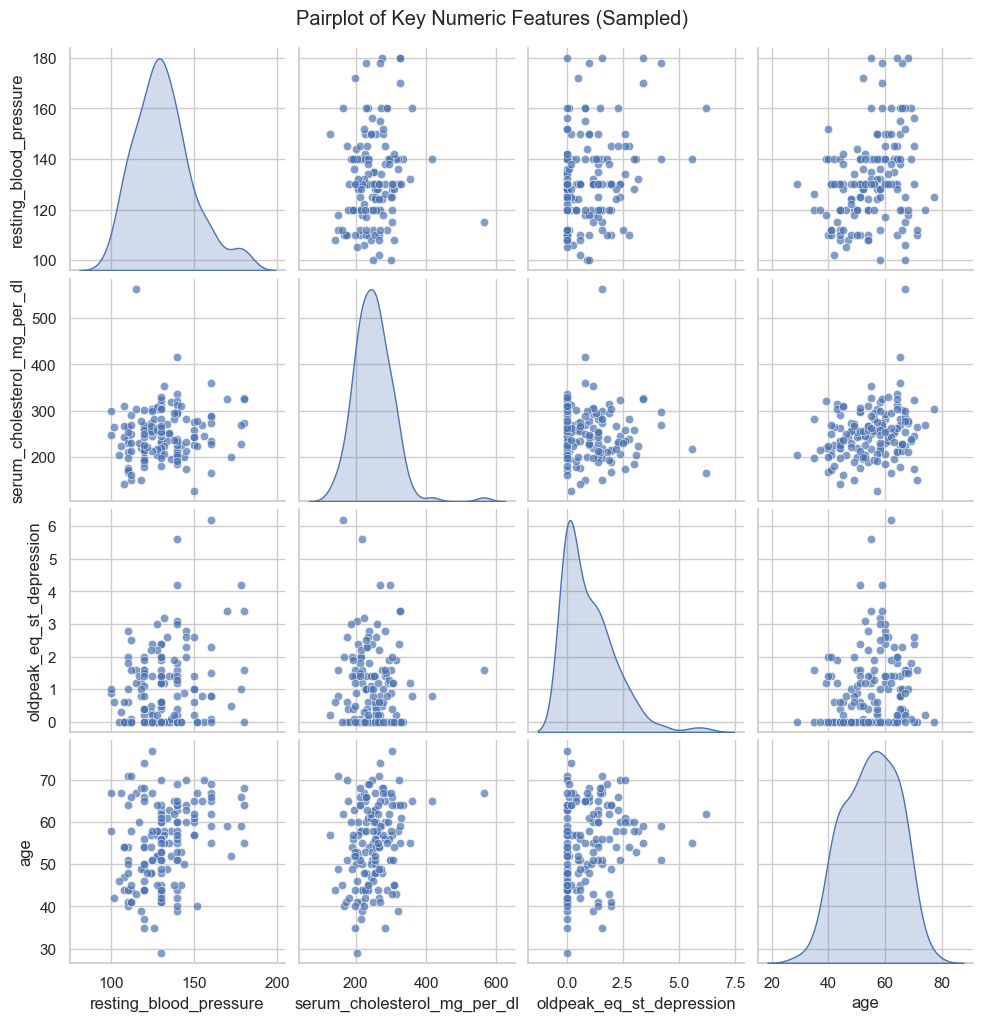

In [80]:
# Extra Visualization 1 – Pairplot 
sample_df = df.sample(n=min(150, len(df)), random_state=42)
numeric_cols = df.select_dtypes(include='number').columns.tolist()[:4]  # first 4 numeric cols
sns.pairplot(sample_df[numeric_cols], diag_kind='kde', plot_kws={'alpha':0.7})
plt.suptitle("Pairplot of Key Numeric Features (Sampled)", y=1.02)
plt.show()

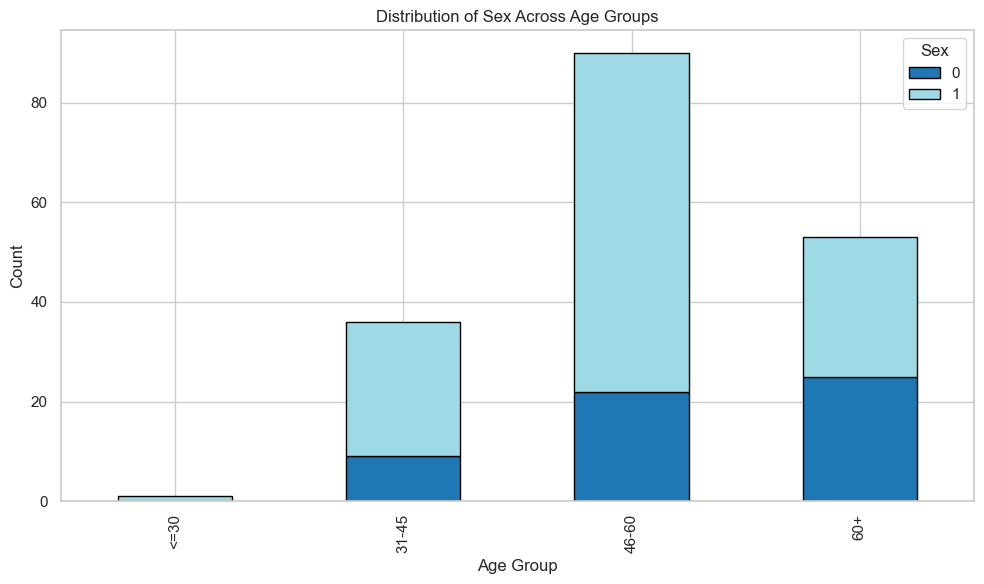

In [81]:
# Extra Visualization 2 – Stacked bar chart for sex by age_group
if 'sex' in df.columns and 'age_group' in df.columns:
    stacked_data = pd.crosstab(df['age_group'], df['sex'])
    stacked_data.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='black')
    plt.title("Distribution of Sex Across Age Groups")
    plt.xlabel("Age Group")
    plt.ylabel("Count")
    plt.legend(title="Sex")
    plt.tight_layout()
    plt.show()

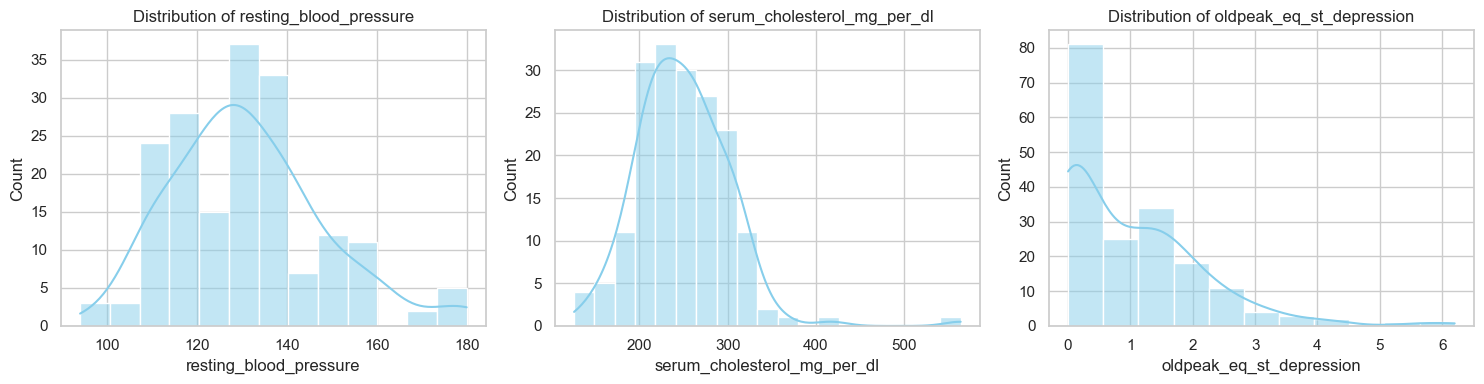

In [82]:
# Extra Visualization 3 – Multiple histograms in one figure
plot_cols = df.select_dtypes(include='number').columns.tolist()[:3]  # first 3 numeric columns
fig, axes = plt.subplots(1, len(plot_cols), figsize=(15,4))
for i, col in enumerate(plot_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

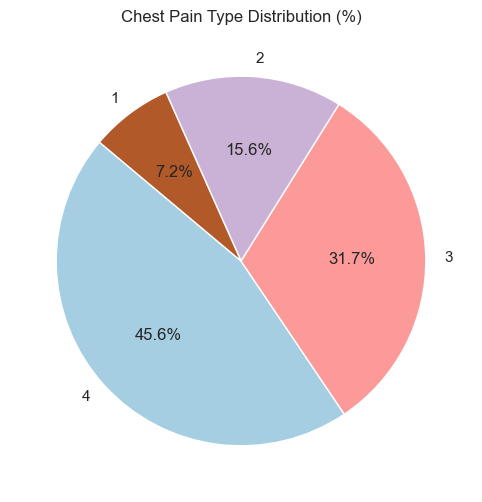

In [83]:
# Extra Visualization 4 – Pie chart of chest_pain_type
if 'chest_pain_type' in df.columns:
    counts = df['chest_pain_type'].value_counts()
    plt.pie(counts, labels=counts.index.astype(str), autopct='%1.1f%%', startangle=140, 
            colors=plt.cm.Paired(np.linspace(0, 1, len(counts))))
    plt.title("Chest Pain Type Distribution (%)")
    plt.show()

# ✅ Task 2 – Summary

In this notebook, we performed a complete **Exploratory Data Analysis (EDA)** and **data cleaning** workflow for the dataset `Heart_Disease_Patient_Data.csv` (original filename: `values.csv`).

### **Steps we completed**
1. **Library Imports & Settings** – Imported Pandas, NumPy, Matplotlib, and Seaborn, set visual styles, and suppressed warnings for clean output.
2. **Data Loading** – Loaded the CSV into a Pandas DataFrame and viewed the structure (`.head()`, `.info()`, `.shape()`).
3. **Column Review** – Listed all column names exactly as in the dataset for reference.
4. **Missing Values Check** – Found that the dataset had no missing values.
5. **Data Cleaning** –  
   - Removed duplicate rows (if any).  
   - Trimmed whitespace in text columns.  
   - Converted suitable columns to categorical types for efficiency.  
6. **Descriptive Statistics** – Summarized both numerical and categorical columns.
7. **Feature Engineering** – Created an `age_group` column for better segmentation.
8. **Grouped Summaries** – Calculated mean values for numeric features grouped by `age_group` and `sex` (if available).
9. **Visualizations** *(optimized for speed)* –  
   - Bar chart for `chest_pain_type` distribution  
   - Histogram for `age`  
   - Boxplot of cholesterol by chest pain type (sampled)  
   - Correlation heatmap of numeric variables (first 8)  
   - Scatterplot for `oldpeak_eq_st_depression` vs `max_heart_rate_achieved` (sampled)  
10. **Top Records Table** – Listed top 10 patients by maximum heart rate achieved.
11. **Cleaned Data Export** – Saved a cleaned copy `values_cleaned_task2.csv`.

---

### **Key Takeaways**
- The dataset is well-structured with no missing values and minimal cleaning required.  
- Certain categorical features (e.g., chest pain type, exercise-induced angina) show clear variation across age groups.  
- Correlation analysis reveals relationships among cardiac health indicators.  
- Visualizations provide an accessible view of patient distributions and feature relationships.  

This EDA sets the stage for **predictive modeling** in future tasks, such as predicting disease presence or risk level.
